In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.90, random_state=42)
_, X_test, _, y_test = train_test_split(X_test, y_test, test_size=0.90, random_state=42)  # Further reduced subset
X_train = X_train.reshape(len(X_train), -1) / 255.0  # Flatten and normalize
X_test = X_test.reshape(len(X_test), -1) / 255.0

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

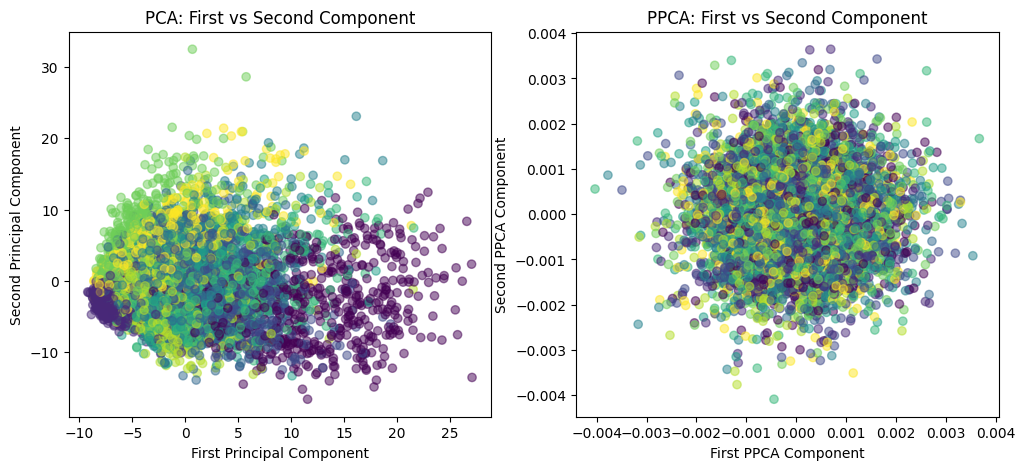

In [6]:
# Apply PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Apply PPCA using Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(X_train_scaled)
X_train_ppca = gmm.sample(len(X_train_scaled))[0]
X_test_ppca = gmm.sample(len(X_test_scaled))[0]

# Plot PCA vs PPCA
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.5, c=y_train, cmap='viridis')
plt.title("PCA: First vs Second Component")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

plt.subplot(1, 2, 2)
plt.scatter(X_train_ppca[:, 0], X_train_ppca[:, 1], alpha=0.5, c=y_train, cmap='viridis')
plt.title("PPCA: First vs Second Component")
plt.xlabel("First PPCA Component")
plt.ylabel("Second PPCA Component")

plt.show()



In [7]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

def build_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_dim,)),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model




In [8]:
# Train model on raw data
model_raw = build_model(X_train_scaled.shape[1])
model_raw.fit(X_train_scaled, y_train_cat, epochs=10, batch_size=256, validation_data=(X_test_scaled, y_test_cat))



Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4721 - loss: 1.7216 - val_accuracy: 0.8413 - val_loss: 0.5850
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8725 - loss: 0.4189 - val_accuracy: 0.8994 - val_loss: 0.3949
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9287 - loss: 0.2391 - val_accuracy: 0.9114 - val_loss: 0.3524
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9600 - loss: 0.1511 - val_accuracy: 0.9208 - val_loss: 0.3318
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9709 - loss: 0.1108 - val_accuracy: 0.9246 - val_loss: 0.3174
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9792 - loss: 0.0885 - val_accuracy: 0.9283 - val_loss: 0.3148
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9823 - loss: 0.0736 - val_accuracy: 0.9314 - val_loss: 0.3115
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9907 - loss: 0.0513 - val_accuracy: 0.9306 - val_loss: 0.

In [9]:
# Train model on PCA-transformed data
model_pca = build_model(X_train_pca.shape[1])
model_pca.fit(X_train_pca, y_train_cat, epochs=10, batch_size=256, validation_data=(X_test_pca, y_test_cat))



Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.1993 - loss: 2.2027 - val_accuracy: 0.3028 - val_loss: 1.8085
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3204 - loss: 1.7756 - val_accuracy: 0.3269 - val_loss: 1.7193
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3325 - loss: 1.7051 - val_accuracy: 0.3364 - val_loss: 1.7008
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3392 - loss: 1.6796 - val_accuracy: 0.3328 - val_loss: 1.6892
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3353 - loss: 1.6820 - val_accuracy: 0.3432 - val_loss: 1.6797
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3340 - loss: 1.6500 - val_accuracy: 0.3533 - val_loss: 1.6756
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3554 - loss: 1.6530 - val_accuracy: 0.3498 - val_loss: 1.6663
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3570 - loss: 1.6615 - val_accuracy: 0.3518 - val_

In [10]:
# Train model on PPCA-transformed data
model_ppca = build_model(X_train_ppca.shape[1])
model_ppca.fit(X_train_ppca, y_train_cat, epochs=10, batch_size=256, validation_data=(X_test_ppca, y_test_cat))

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.1038 - loss: 2.5069 - val_accuracy: 0.1018 - val_loss: 2.3785
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2121 - loss: 2.1817 - val_accuracy: 0.1013 - val_loss: 2.3774
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2930 - loss: 2.0698 - val_accuracy: 0.1019 - val_loss: 2.4054
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.3591 - loss: 1.9433 - val_accuracy: 0.1021 - val_loss: 2.4420
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4201 - loss: 1.8305 - val_accuracy: 0.0994 - val_loss: 2.4892
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4798 - loss: 1.7169 - val_accuracy: 0.1007 - val_loss: 2.5494
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5312 - loss: 1.5867 - val_accuracy: 0.1008 - val_loss: 2.6107
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5812 - loss: 1.4694 - val_accuracy: 0.1014 - v